# Logistic Regression (Binary Classification) Exercise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Data Exploration & Visualization

In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

<Axes: xlabel='salary'>

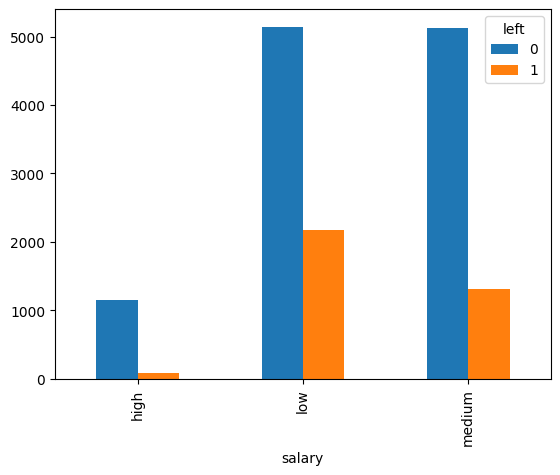

In [5]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='number_project'>

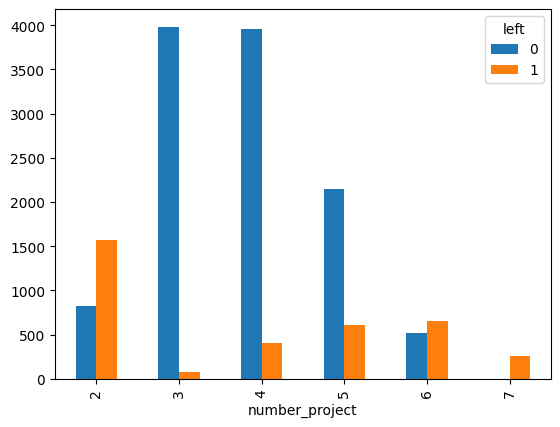

In [6]:
pd.crosstab(df.number_project,df.left).plot(kind='bar')

<Axes: xlabel='time_spend_company'>

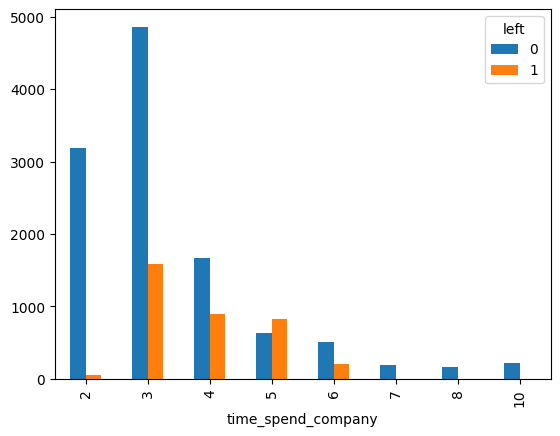

In [7]:
pd.crosstab(df.time_spend_company,df.left).plot(kind='bar')

<Axes: xlabel='Work_accident'>

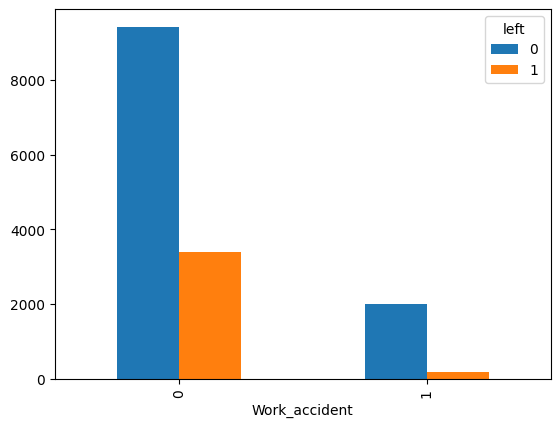

In [8]:
pd.crosstab(df.Work_accident,df.left).plot(kind='bar')

<Axes: xlabel='promotion_last_5years'>

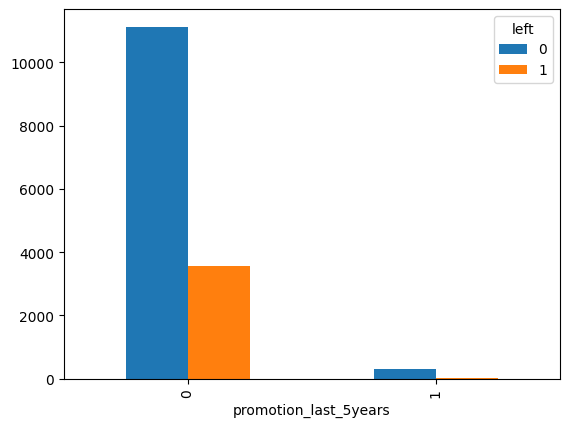

In [9]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

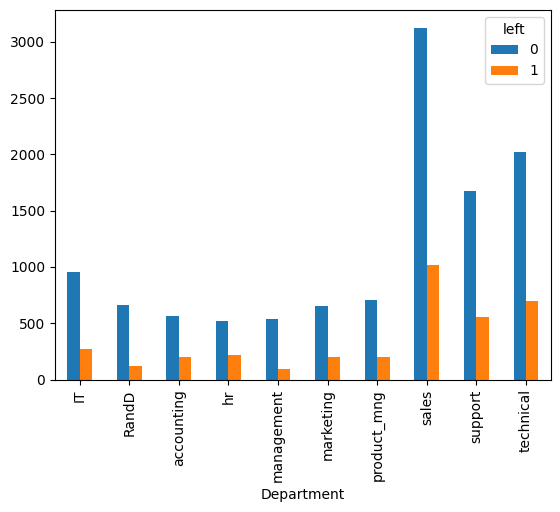

In [10]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<Axes: xlabel='promotion_last_5years'>

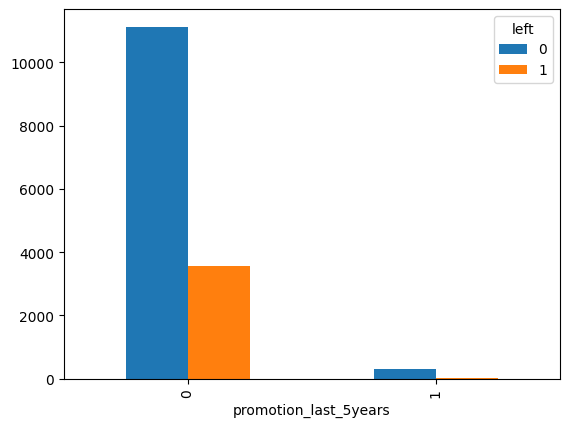

In [11]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

<Axes: xlabel='salary'>

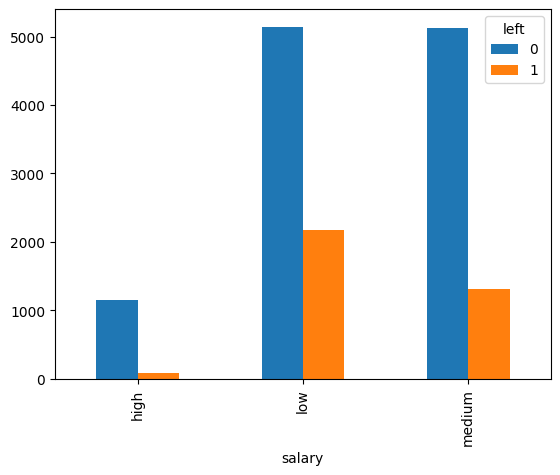

In [12]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

**From the data analysis we can conclude that we should use following variables as independent variables in our model and the others doesn't affect in employees leaving:**

  **1.   satisfaction_level**

  **2.   average_montly_hours**

  **3.   promotion_last_5years**
  
  **4.   salary**

### Create dummy variables

In [13]:
subdf = df[['satisfaction_level', 'promotion_last_5years', 'average_montly_hours']]
subdf

,satisfaction_level,promotion_last_5years,average_montly_hours
0,0.38,0,157
1,0.80,0,262
2,0.11,0,272
3,0.72,0,223
4,0.37,0,159
...,...,...,...
14994,0.40,0,151
14995,0.37,0,160
14996,0.37,0,143
14997,0.11,0,280


In [14]:
dummies = pd.get_dummies(df.salary)
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [15]:
subdf_with_dummies = pd.concat([subdf, dummies], axis='columns')
subdf_with_dummies

,satisfaction_level,promotion_last_5years,average_montly_hours,high,low,medium
0,0.38,0,157,False,True,False
1,0.80,0,262,False,False,True
2,0.11,0,272,False,False,True
3,0.72,0,223,False,True,False
4,0.37,0,159,False,True,False
...,...,...,...,...,...,...
14994,0.40,0,151,False,True,False
14995,0.37,0,160,False,True,False
14996,0.37,0,143,False,True,False
14997,0.11,0,280,False,True,False


In [16]:
finaldf = subdf_with_dummies.drop(['high'], axis='columns')
finaldf

,satisfaction_level,promotion_last_5years,average_montly_hours,low,medium
0,0.38,0,157,True,False
1,0.80,0,262,False,True
2,0.11,0,272,False,True
3,0.72,0,223,True,False
4,0.37,0,159,True,False
...,...,...,...,...,...
14994,0.40,0,151,True,False
14995,0.37,0,160,True,False
14996,0.37,0,143,True,False
14997,0.11,0,280,True,False


### Splits dataset (X, y) into training (70%) and testing (30%) sets:

In [17]:
X = finaldf

In [18]:
y = df.left

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
X_test

,satisfaction_level,promotion_last_5years,average_montly_hours,low,medium
11789,0.72,0,239,False,True
2058,0.63,0,237,False,True
814,0.10,0,253,True,False
2818,0.64,0,101,True,False
8287,0.85,0,158,False,True
...,...,...,...,...,...
6256,0.82,0,173,True,False
8259,0.94,0,218,False,True
14178,0.82,0,148,True,False
5680,0.91,0,139,False,True


### Trains the model

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
model.predict([[0.43, 0, 250, 0, 1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [23]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
model.score(X_test, y_test)

0.7824444444444445

### Save the trained model

In [25]:
import joblib

In [26]:
joblib.dump(model, 'saved_model')

['saved_model']